## Problem Statement
### About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.



### Data
#### Variable : Description
 - **Loan_ID** : Unique Loan ID
 - **Gender** : Male/ Female
 - **Married** : Applicant married (Y/N)
 - **Dependents** : Number of dependents
 - **Education** : Applicant Education (Graduate/ Under Graduate)
 - **Self_Employed** : Self employed (Y/N)
 - **ApplicantIncome** : Applicant income
 - **CoapplicantIncome** : Coapplicant income
 - **LoanAmount** : Loan amount in thousands
 - **Loan_Amount_Term** : Term of loan in months
 - **Credit_History** : credit history meets guidelines
 - **Property_Area** : Urban/ Semi Urban/ Rural
 - **Loan_Status** : Loan approved (Y/N)

In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('gist_earth')

In [36]:
train = pd.read_csv("/Users/ranjansahoo/DATA_SCIENCR_PROJECTS/LoanPredictiondata/train_loan.txt")

In [14]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
test = pd.read_csv("/Users/ranjansahoo/DATA_SCIENCR_PROJECTS/LoanPredictiondata/test_loan.txt")

In [16]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [17]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [19]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


## Visualizing Missing Values through different ways

### Count of missing values in all the columns

In [20]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Viewing only the coulmns which has missing values

In [23]:
count = 0
for i, v in train.isnull().sum().items():
    if train.isnull().sum()[i] != 0:
        print(i, ":", v)
        count+=1
print(count)

Gender : 13
Married : 3
Dependents : 15
Self_Employed : 32
LoanAmount : 22
Loan_Amount_Term : 14
Credit_History : 50
7


In [24]:
count = 0
for i, v in test.isnull().sum().items():
    if train.isnull().sum()[i] != 0:
        print(i, ":", v)
        count+=1
print(count)

Gender : 11
Married : 0
Dependents : 10
Self_Employed : 23
LoanAmount : 5
Loan_Amount_Term : 6
Credit_History : 29
7


### Visulizing the missing valures through a heatmap

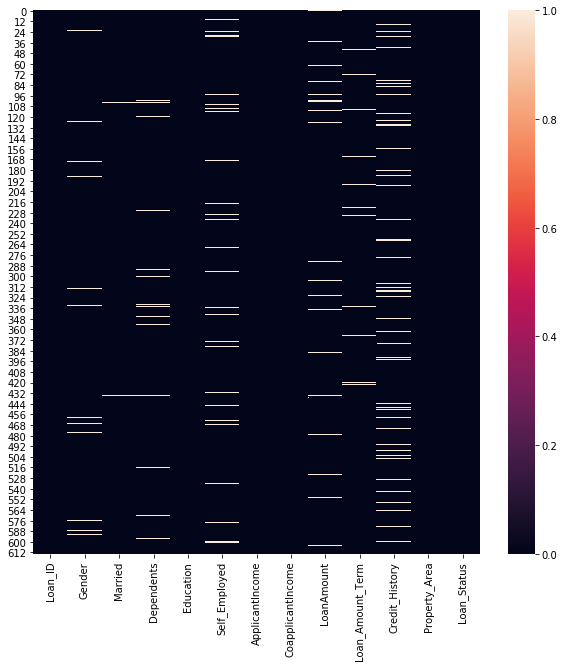

In [26]:
# Visualize the missing value
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull())

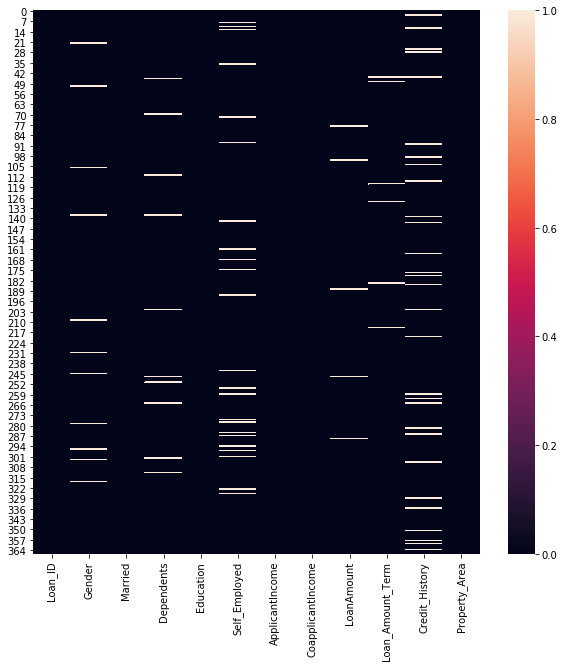

In [27]:
# Visualize the missing value
plt.figure(figsize=(10,10))
sns.heatmap(test.isnull())

### Imputing missing values

In [38]:
count = 0
for i, v in train.isnull().sum().items():
    if train.isnull().sum()[i] != 0:
        print(i, ":", v)
        count+=1
print(count)

Gender : 13
Married : 3
Dependents : 15
Self_Employed : 32
LoanAmount : 22
Loan_Amount_Term : 14
Credit_History : 50
7


In [39]:
count = 0
for i, v in test.isnull().sum().items():
    if train.isnull().sum()[i] != 0:
        print(i, ":", v)
        count+=1
print(count)

Gender : 11
Married : 0
Dependents : 10
Self_Employed : 23
LoanAmount : 5
Loan_Amount_Term : 6
Credit_History : 29
7


In [31]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [32]:
test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [65]:
train.Gender.fillna(value = 'Male', inplace = True)
test.Gender.fillna(value = 'Male', inplace = True)

In [40]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [41]:
test.Married.value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [42]:
train.Married.fillna(value = 'Yes', inplace = True)
test.Married.fillna(value = 'Yes', inplace = True)

In [43]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [44]:
test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [47]:
train.Dependents.fillna(value =train.Dependents.mode()[0], inplace = True)
test.Dependents.fillna(value = test.Dependents.mode()[0], inplace = True)

In [48]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [49]:
test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [50]:
train.Self_Employed.fillna(value = 'No', inplace = True)
test.Self_Employed.fillna(value = 'No', inplace = True)

In [56]:
train.LoanAmount.fillna(value =train.LoanAmount.mean(), inplace = True)
test.LoanAmount.fillna(value =test.LoanAmount.mean(), inplace = True)

In [57]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [58]:
test.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [59]:
train.Loan_Amount_Term.fillna(value =train.Loan_Amount_Term.mode()[0], inplace = True)
test.Loan_Amount_Term.fillna(value = test.Loan_Amount_Term.mode()[0], inplace = True)

In [60]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [62]:
test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [63]:
train.Credit_History.fillna(value =train.Credit_History.mode()[0], inplace = True)
test.Credit_History.fillna(value = test.Credit_History.mode()[0], inplace = True)

In [66]:
count = 0
for i, v in train.isnull().sum().items():
    if train.isnull().sum()[i] != 0:
        print(i, ":", v)
        count+=1
print(count)

0


In [67]:
count = 0
for i, v in test.isnull().sum().items():
    if test.isnull().sum()[i] != 0:
        print(i, ":", v)
        count+=1
print(count)

0


### Visualizing Outliers

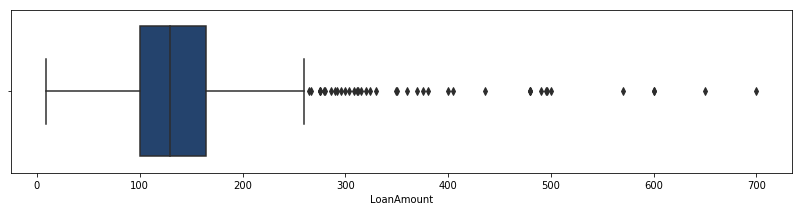

In [87]:
plt.figure(figsize=(14,3))
sns.boxplot(x ='LoanAmount', data = train)
plt.show()

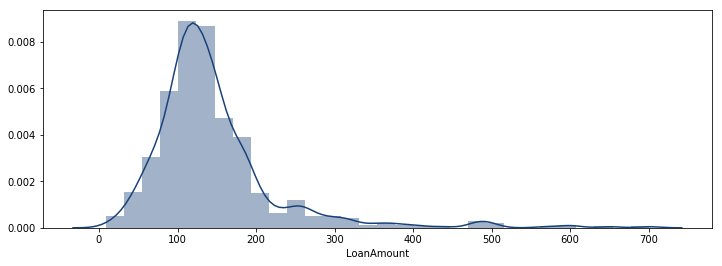

In [92]:
plt.figure(figsize=(12,4))
sns.distplot(train['LoanAmount'],bins=30)
plt.show()

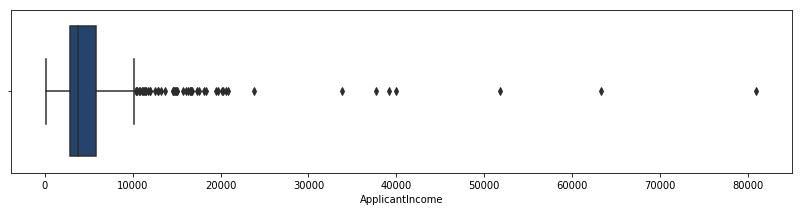

In [88]:
plt.figure(figsize=(14,3))
sns.boxplot(x ='ApplicantIncome', data = train)
plt.show()

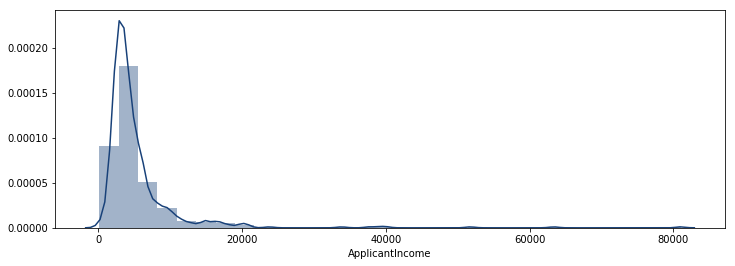

In [93]:
plt.figure(figsize=(12,4))
sns.distplot(train['ApplicantIncome'],bins=30)
plt.show()

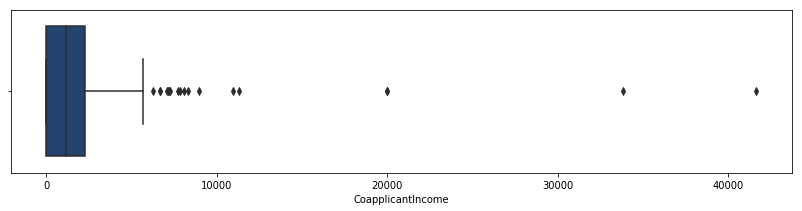

In [89]:
plt.figure(figsize=(14,3))
sns.boxplot(x ='CoapplicantIncome', data = train)
plt.show()

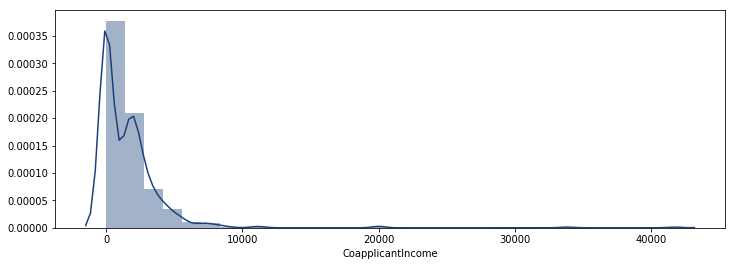

In [94]:
plt.figure(figsize=(12,4))
sns.distplot(train['CoapplicantIncome'],bins=30)
plt.show()

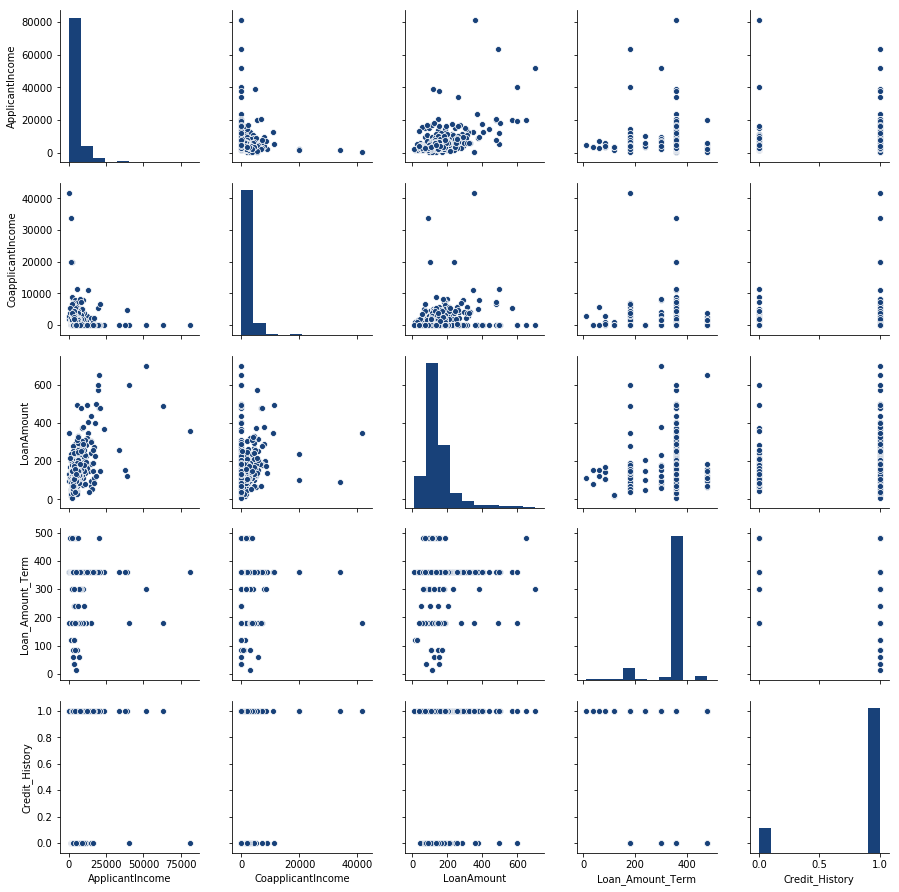

In [91]:
sns.pairplot(data = train)
plt.show()

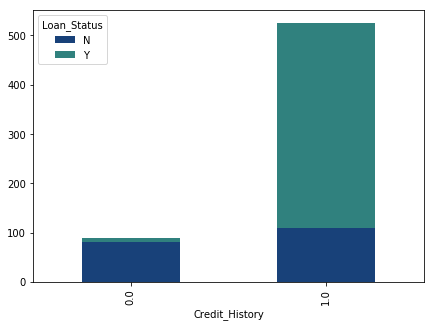

In [95]:
temp1 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp1.plot(kind='bar', stacked=True, figsize=(7,5))

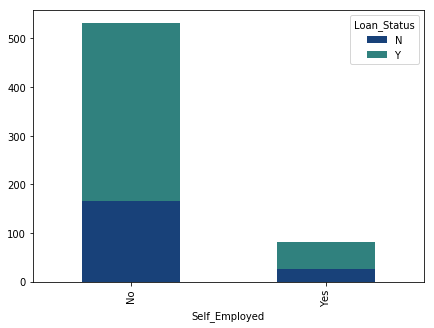

In [97]:
temp2 = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
temp2.plot(kind='bar', stacked=True, figsize=(7,5))

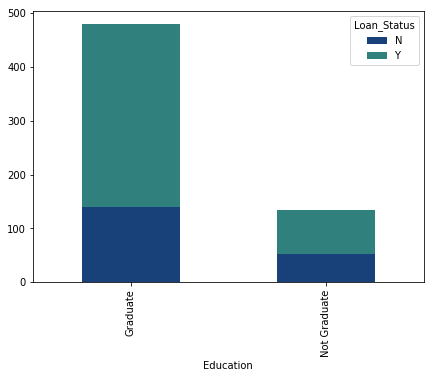

In [98]:
temp3 = pd.crosstab(train['Education'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, figsize=(7,5))

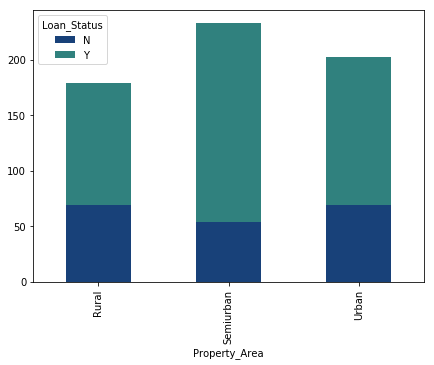

In [99]:
temp4 = pd.crosstab(train['Property_Area'], train['Loan_Status'])
temp4.plot(kind='bar', stacked=True, figsize=(7,5))

### Preparing data for ML use

In [131]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [132]:
new_train = train.drop('Loan_ID', axis = 1)
new_test = test.drop('Loan_ID', axis = 1)

In [137]:
print(new_train.shape)
print(new_test.shape)

(614, 12)
(367, 11)


In [133]:
x_train = new_train.drop("Loan_Status", axis = 1)

In [134]:
y_train = train.Loan_Status

In [138]:
print(x_train.shape)
print(new_test.shape)

(614, 11)
(367, 11)


In [136]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
x_train.columns

In [118]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
le = LabelEncoder()

In [121]:
y_scaled = pd.DataFrame(le.fit_transform(y_train))

In [139]:
x_dummy = pd.get_dummies(x_train)
x_scaled = pd.DataFrame(sc.fit_transform(x_dummy),columns= x_dummy.columns)

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [140]:
x_scaled.shape

(614, 20)

In [141]:
x_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,0.000000,0.273231,0.411733,-0.472343,0.472343,1.372089,-1.372089,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147
1,-0.134412,-0.038732,-0.219273,0.273231,0.411733,-0.472343,0.472343,-0.728816,0.728816,-1.190514,2.240448,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,1.558899,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.957641,0.273231,0.411733,-0.472343,0.472343,-0.728816,0.728816,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,-2.547117,2.547117,-0.641478,-0.782016,1.428147
3,-0.462062,0.251980,-0.314547,0.273231,0.411733,-0.472343,0.472343,-0.728816,0.728816,0.839974,-0.446339,-0.443713,-0.300975,-1.892641,1.892641,0.392601,-0.392601,-0.641478,-0.782016,1.428147
4,0.097728,-0.554487,-0.064454,0.273231,0.411733,-0.472343,0.472343,1.372089,-1.372089,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147


In [142]:
x_scaled.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [143]:
y_scaled.head()

,0
0,1
1,0
2,1
3,1
4,1


In [144]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled, y_scaled, test_size = 0.3, random_state = 10)

In [145]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(429, 20)
(185, 20)
(429, 1)
(185, 1)


### Applying different models

In [147]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier # Ensemble
from sklearn.tree import DecisionTreeClassifier # Decision tree
from sklearn.linear_model import LogisticRegression # Logistic Regression

model_bc = BaggingClassifier()
model_rfc = RandomForestClassifier()
model_abc = AdaBoostClassifier()
model_dtc = DecisionTreeClassifier()
model_log = LogisticRegression()

In [148]:
# Logistic Regression
model_log.fit(xtrain, ytrain)

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [149]:
# Decision Tree Classification
model_dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [150]:
# Random Forest Classification
model_rfc.fit(xtrain, ytrain)

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [151]:
# Bagging Classification
model_bc.fit(xtrain, ytrain)

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [152]:
# Adaboost Classification
model_abc.fit(xtrain, ytrain)

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [153]:
from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score,confusion_matrix,f1_score,recall_score

In [156]:
# Logistic Regression
y_pred_log = model_log.predict(xtest)

In [157]:
print("Accuracy Score : ", accuracy_score(ytest, y_pred_log))

Accuracy Score :  0.7945945945945946


In [165]:
# Decision Tree Classification
y_pred_dc = model_dtc.predict(xtest)

In [166]:
print("Accuracy Score : ", accuracy_score(ytest, y_pred_dc))

Accuracy Score :  0.7027027027027027


In [167]:
# Random Forest Classification
y_pred_rfc = model_rfc.predict(xtest)

In [168]:
print("Accuracy Score : ", accuracy_score(ytest, y_pred_rfc))

Accuracy Score :  0.7837837837837838


In [169]:
# Bagging Classification
y_pred_bc = model_bc.predict(xtest)

In [170]:
print("Accuracy Score : ", accuracy_score(ytest, y_pred_bc))

Accuracy Score :  0.7513513513513513


In [171]:
# Adaboost Classification
y_pred_abc = model_abc.predict(xtest)

In [172]:
print("Accuracy Score : ", accuracy_score(ytest, y_pred_abc))

Accuracy Score :  0.7783783783783784


#### After using different models Logistic Regression model gives the best score.
So, I will go with Logistic Regression model

### Tuning of Logistic Regression Model using GridSearch

In [173]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [174]:
# Create grid search using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model_log, hyperparameters, cv=5, verbose=0)

In [175]:
# Fit grid search
best_model = clf.fit(xtrain, ytrain)

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

In [176]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [177]:
# Predict target vector
best_model.predict(xtest)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [178]:
print("Accuracy Score : ", accuracy_score(ytest, best_model.predict(xtest)))

Accuracy Score :  0.8


### Now Applying Best model to the whole test data

In [180]:
best_model.fit(x_scaled, y_scaled)

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/U

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Preparing test data for ML use

In [182]:
new_test_dummy = pd.get_dummies(new_test)

In [183]:
new_test_scaled = pd.DataFrame(sc.fit_transform(new_test_dummy), columns=new_test_dummy.columns)

/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ranjansahoo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Making prediction using the best model

In [184]:
data_predict = best_model.predict(new_test_scaled)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,